# An introduction to machine learning using Python

This couse is desiged to give a gentle but practical introduction to the basic concepts encountered in machine learning. There will be very little maths involved and the Python programming used to run through the course will be fairly straightforward. This will hopefully be sufficient to demonstrate the key, high-level concepts behind machine learning and introduce a basic operational workflow. The objective is to empower the programmer to experiment with their own projects. Learning about the more mathematical inner workings of the machine learning approaches may well be of interest to those who wish to delve further. However, in many cases, this is not necessary to get a degree of intuition about the process, and to generate practical learning models.

The examples in this course will mostly be examples of *supervised* learning; machine learning models where the objective relates to some target data that is separate from the input data to learn from. An example here would be to learn the classification of an image; the target classification (the label) is a somewhat separate quality from the input, although hopefully derivable from it. Where there is no separate set of target data, machine learning can be decribed as *unsupervised* and in these cases the objective is to learn to structure, or transform, the data to reveal its underlying organisation. It is notable that supervised and unsupervised aspects are mixed together in some cases, and so the supervised/unsupervised disctinction is more of a guide than a rule.

An often mentioned aspect of machine learning, which will not be covered here, is *reinforcement* learning. This is 
is like unsupervised learning, in that it has no separately supplied target data/labels. However, the learning objective responds to a reward from an external environment. An example would be a car learning to drive within the street envrionment indicated by its sensors, rewarded by following the rules of the road and not crashing.

## Python modules for machine learning

As we move through machine learning concepts here we will make extensive use of the SciKit learn Python library. This is an excellent collection of almost everything we will need to get started. It should be noted that we will initially only cover the more traditional, non-deep leaning methods; deep neural networks are covered in the next course.

For this course, a basic familiarity with the Python language and its NumPy module is assumed. The Python Beginners' Course and Numeric Python Course are provided separately, if needed. 

Our first Python code is to import the handy modules that we will be using throughout: Numpy, aliased as `np` is for the array/tensor based operations, `sklearn` provides the specialise machine learning functions and pyplot, asliased as `plt` allows us to visualise the data in a graphical way.

In [4]:
# Main module imports for the course
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import warnings
import course_util as util
import importlib
importlib.reload(util)

<module 'course_util' from '/home/tjs23/gh/python_ml_course/course_util.py'>

## Separating data clusters

For our first example we will consider some synthetic data. The data is 2D and can be thought of as a seris of (x,y) points. This is perhaps trivial and dull data, but we can control how it is generated and it will allow us get to the crux of what machine learning is all about.

The synthetic data will be constructed by making three groups of normally distributed (Gaussian) data. Each group's statistical distribution has different parameters: an `[x,y]` centre; mean, and a spread; circular standard deviation. The three data groups are made of 50, 100, and 200 points respectively, sampled randomly from the three distributions.

In [5]:
# Normally distributed random numbers : needs mean, STD and array size
group1 = np.random.normal([-0.2, 0.0], 0.3, (50,2)) 
group2 = np.random.normal([0.8, 0.8], 0.2, (100,2))
group3 = np.random.normal([0.0, 1.0], 0.5, (200,2))

The three groups are then joined into one 2D array, via `concatenate`, and we can extract the X- and Y- coordnates of this array to plot the overall data. Note that we transpose the array with `.T`; this swaps the rows with the columns, and provides a handy means of assiging to separate X and Y coordinates, which are required for the scatter plot.
(We could also use `mixed_data[:,0]` to get all rows, X column etc.).

In [6]:
# Combine groups into one array
mixed_data = np.concatenate([group1, group2, group3])
print(mixed_data.shape)
print(mixed_data.T.shape)
xx, yy = mixed_data.T

(350, 2)
(2, 350)


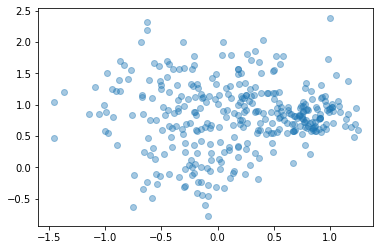

In [1119]:
# Make scatterplot with X and Y points
plt.scatter(xx, yy, alpha=0.4) # alpha sets opacity to show overlap better

To go with this data we constriuct an array (350 values) that contains the original, true group identities of all these points. This will be done using integer values `0`, `1` and `2` to indicate the group label. These labels will then serve as the idealised targets for machine laerning models to recreate.

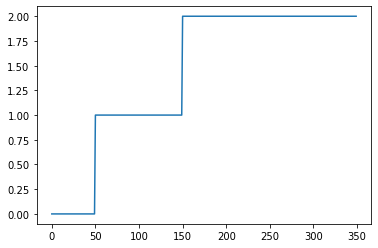

In [7]:
# Concatenate lists of 0, 1 and 2 and convert to array
true_classes = np.array([0] * 50 + [1] * 100 + [2] * 200)
plt.plot(true_classes) 

To visualise the true/target group labels we can plot the original groups separately in different colours. Note that there is some overlap between the classes and so we would not expect to be able to separate these perfectly based on [x,y] location. Note the use of `*` here which is a handy way of in unpacking the X and Y coordinates for the plotting function.

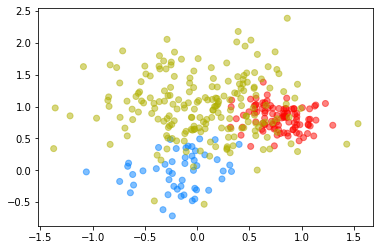

In [8]:
cmap1 = util.colorlist('#0080FF','#FF0000','#B0B000')
plt.scatter(*mixed_data.T, c=true_classes, alpha=0.5, cmap=cmap1)

The first learning approach use here, to separate and classify the mixed data, is via k-means clustering. This simple clustering will be used to separate the data, and then using the learned separation rules (the boundaries) we can make predictive classifications, on data not used in the initial clustering.

As is typical with `sklearn`, we employ one of its modules to create a *model*. Here the model simply refers to a parameterised method for discriminating or transforming data, that can learn by adaptation to a training dataset. Here the adaptation is done by invoking `.fit()` on the mixed group data. The value of `3` passed to the `KMeans` model states the number of clusters to assume in the fit and setting the `random_state` provides reproducibility.

In [10]:
kmeans_model = sklearn.cluster.KMeans(3, random_state=7)
kmeans_model.fit(mixed_data)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,7
,copy_x,True
,algorithm,'lloyd'


Once the data is fit to the model we can inspect its attributes to see the results. Here we look at `.labels_`, which is an integer array of classifiations, indicating which cluster, of the three possibilities, each point belongs to.

In [11]:
k_classes = kmeans_model.labels_
print(k_classes[45:55]) # Print in the range where we expect a group boundary

[0 0 0 0 0 1 1 1 1 1]


The class labels `k_classes` can then be used to colour the mixed data. Note how linear boundaries are used to separate three clusters. The boundaries arise because k-means clustering defines cluster centres and then allocates points to their closest centre.

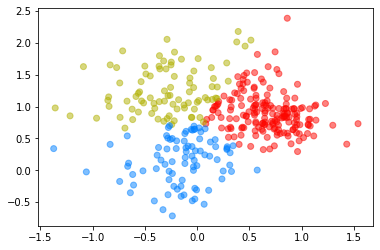

In [12]:
plt.scatter(*mixed_data.T, c=k_classes, alpha=0.5, cmap=cmap1)

Next, three new, points `pred_points` are defined, which we can superimpose upon the clusters, here as black spots.

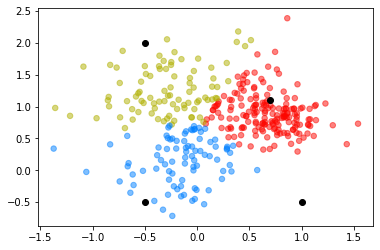

In [13]:
pred_points = np.array([[-0.5, -0.5],
                        [ 0.7,  1.1],   
                        [-0.5,  2.0],
                        [ 1.0, -0.5]])

plt.scatter(*mixed_data.T, c=k_classes, s=30, alpha=0.5, cmap=cmap1)
plt.scatter(*pred_points.T, color='k')

To obtain the classification for the new points the `.predict()` method is run, from the previously fitted model, using these points. In essence, the model is determining which region each of the new [x,y] coordinates lies within. Note that, although the clusters separated here mostly match the original groups, the actual index numbers used to label each class are somewhat arbitrary and are often swapped round.

In [14]:
print(kmeans_model.predict(pred_points))

[0 1 2 0]


To get a clearer indication of the decsion boundaries used for this classification we can run the model prediction on a wide sample of points to observe the outcome.

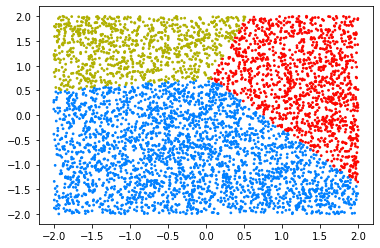

In [15]:
sample_data = np.random.uniform(-2.0, 2.0, (5000, 2))
sample_classes = kmeans_model.predict(sample_data)

plt.scatter(*sample_data.T, c=sample_classes, s=3, cmap=cmap1)

The `sklearn` module has a handy `DecisionBoundaryDisplay` object to perform the same task, by selecting from a grid.

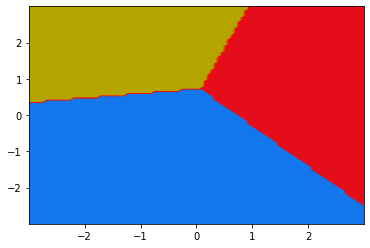

In [16]:
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(kmeans_model, sample_data, cmap=cmap1, response_method="predict")

The next ML method illustrated moves beyond simple clustering to a more canonical machine learning method: k-nearest neighbours (k-NN). With the clustering we let the model separate into a given number of classes. However, for k-NN (like many ML methods) we will specify input training data with directly paired target labels. Accordingly, each input [x,y] point (`mixed_data`) has a corresonding class integer (0, 1 or 2), indicating its true identity (`true_classes`).

The k-NN model is created and then fitted to the data in the manner typical of `sklearn`. Here the `KNeighboursClassifier` has the number of neighbours parameter set to `5`, but you may like to see the effect of choosing other values. 

In [17]:
knn_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model.fit(mixed_data, true_classes)
knn_classes = knn_model.predict(mixed_data)

Internally the k-NN method makes predictions on unseen datapoints by taking a poll of its *k* nearest neighbours (*k*=5 here) with a class label. The majoriy class label from the training neigbours is then taken as the prediction for the unseen point. As is illustrated in the below plots, the k-NN often has curved decision boundaries, which can more or less closely hug the training labels, according to the value of *k*; smoother for larger values.

Text(0.5, 1.0, 'True Class')

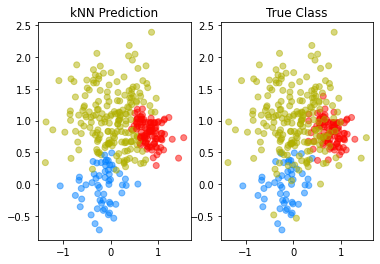

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(*mixed_data.T, c=knn_classes, alpha=0.5, cmap=cmap1)
ax1.set_title('kNN Prediction')

ax2.scatter(*mixed_data.T, c=true_classes, alpha=0.5, cmap=cmap1)
ax2.set_title('True Class')

For contrast we will show another, commonly used, type of machine leaning model. This is a kind of Support Vector Machine (SVM); we will skip discussion of the inner workings of this method, but suffice it to mention that SVMs are able to separate data by applying a *kernel function* to the data to spread the data into extra dimensions (new axes) according to their training label. Here you can imagine that each of the training [x,y] points is given an extra "z" coordinate so that the three classes are separated into different layers. The decision boundaries between label classes will be flat planes though this higher dimensional space, though these often appear as curves when projected down to the origainal 2D.

The model is generated and fit from using the support vector classifier method (`SVC()`), which is a subtype of SVM.

In [19]:
svm_model = sklearn.svm.SVC()
svm_model.fit(mixed_data, true_classes)
svm_classes = svm_model.predict(mixed_data)

Plotting the predictions for this method, albeit for the training data, shows that the separation is according to curved boundary, which fits the data resonably well.

Text(0.5, 1.0, 'True Class')

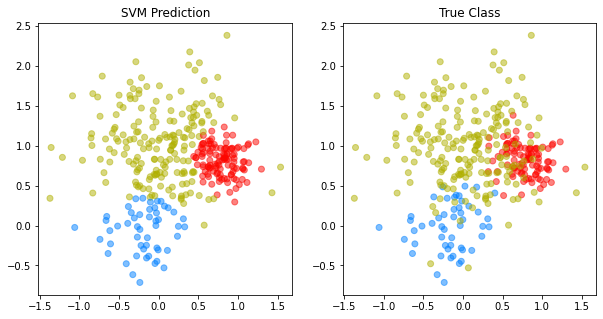

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
scatter_kw = dict(alpha=0.5, cmap=cmap1)

ax1.scatter(*mixed_data.T, c=svm_classes, **scatter_kw)
ax1.set_title('SVM Prediction')

ax2.scatter(*mixed_data.T, c=true_classes, **scatter_kw)
ax2.set_title('True Class')

##  <font color="purple">Exercise:</font>

<font color="purple">As the demo data is really generated by a mixture of Gussians, in reality the most appropriate ML method to apply would be the Gaussian Mixture Model. This aims to recapitulate the means and standard distributions of an number of underlying distributions. Also, this method is useful in that we can quantify the degree of class overlap, betweeen two or mode deconvolved Gaussians, for any point.

As an exercise fit a `class sklearn.mixture.GaussianMixture` model for the data, in a similar manner to other approaches. Then run `.predict()` and plot the output as a scatter, similar to above.

</font>

In [21]:
gmm_model = sklearn.mixture.GaussianMixture(n_components=3)  # Model as 3 normal distribs

# Exercise code goes here
"""
gmm_classes = ...


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

ax1.scatter(group_x, group_y, c=gmm_classes, **scatter_kw)
ax1.set_title('GMM Prediction')

ax2.scatter(group_x, group_y, c=true_classes, **scatter_kw)
ax2.set_title('True Class')"""

"\ngmm_classes = ...\n\n\nfig, (ax1, ax2) = plt.subplots(1, 2)\nfig.set_size_inches(10, 5)\n\nax1.scatter(group_x, group_y, c=gmm_classes, **scatter_kw)\nax1.set_title('GMM Prediction')\n\nax2.scatter(group_x, group_y, c=true_classes, **scatter_kw)\nax2.set_title('True Class')"

Using the random sampling approach, as before, we can explore the 2D decision boundaries for each of the ML methods used so far. Note how the different methods have different shaped boundaries and that this will have an impact on how the classifier extrapolates to values distant from the training data.

In [22]:
sample_data = np.random.uniform(-3.0, 3.0, (5000, 2)) # 5000 times [x,y] pointsm, sampled uniformly from -2 to 2 
pred1 = kmeans_model.predict(sample_data)
pred2 = knn_model.predict(sample_data)
pred3 = svm_model.predict(sample_data)

Text(0.5, 1.0, 'Support Vector')

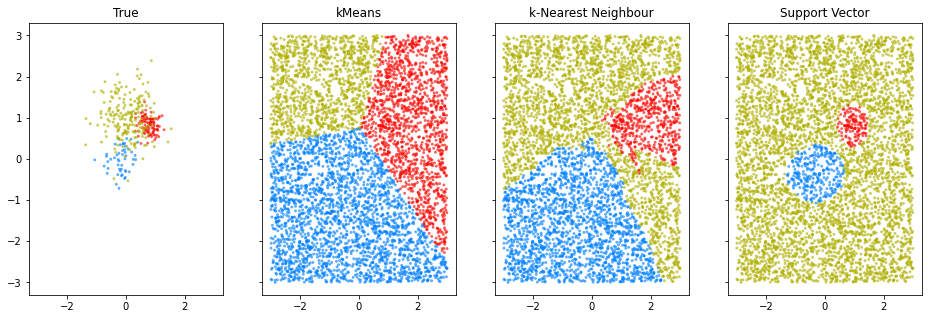

In [23]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharex=True, sharey=True)
fig.set_size_inches(16,5)
plot_params = dict(s=4, alpha=0.5, cmap=cmap1)

ax0.scatter(*mixed_data.T, c=true_classes, **plot_params)
ax0.set_title('True')

ax1.scatter(*sample_data.T, c=pred1, **plot_params)
ax1.set_title('kMeans')

ax2.scatter(*sample_data.T, c=pred2, **plot_params)
ax2.set_title('k-Nearest Neighbour')

ax3.scatter(*sample_data.T, c=pred3, **plot_params)
ax3.set_title('Support Vector')

It is clear that these predictors operate fairly differently outside of the data-rich region. In a real-world sitruation the best method will depend on the task at hand. When dealing with somewhat different, outlier points, a linear extrapolation may be resonable but in other cases having one class become the default (as happens here with SVM) may be better. 

In some situations it may be better to make no classification at all if a data point occurs well outside the trained region. One approach would be to pre-check data and exclude based on (dis)similarity to known data. A means of doing this automatically inside the same machine learning model is to add a new *null* class outside the region of labelled data. 

Below is some code to generate data points randomly from a region [-3.0, 3.0], on both axes, and keep only those points that are more than a certain distance away from all known points. Thes points and their new class label can then be added to the previous mixed dataset.

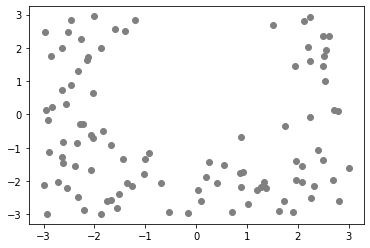

In [24]:
# Create random data for a new, null, class
# points should not be too close to existing examples
null_data = []
null_labels = []

while len(null_data) < 100:
    point = np.random.uniform(-3.0, 3.0, 2)      # Random 2D point
    diffs = mixed_data - point                   # Difference to all known data
    min_dist2 = min((diffs * diffs).sum(axis=1)) # Smallest square distance
    
    if min_dist2 < 0.5:  # Skip if too close
        continue
    
    # When not too close add a null point and its class index 
    null_data.append(point)
    null_labels.append(3)
    
null_data = np.array(null_data)
null_labels = np.array(null_labels)

plt.scatter(*null_data.T, color='#808080')

The new, random null class data and labels are added to the end of the previous dat via `np.concatenate`.

In [25]:
# Extend original training data, and target labels, with null data
ext_data = np.concatenate([mixed_data, null_data])
ext_classes = np.concatenate([true_classes, null_labels])

The same kinds of machine learning model can then be fit to this extended data in the usual manner. Note thate we are initialising the k-means clustering with `pred_points` so that its class indices will match what we had previously; else the cluster numbers will be arbitrary.

In [26]:
kmeans_model2 = sklearn.cluster.KMeans(4, init=pred_points)
kmeans_model2.fit(ext_data)

knn_model2 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model2.fit(ext_data, ext_classes)

svm_model2 = sklearn.svm.SVC()
svm_model2.fit(ext_data, ext_classes)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


The trained models are then used for making predictions on the same randomly sampled data as before, to show the decsion boundaries.

In [27]:
pred1 = kmeans_model2.predict(sample_data)
pred2 = knn_model2.predict(sample_data)
pred3 = svm_model2.predict(sample_data)

We create new colour map with an extra grey to represent the new null class, and plot the preedictions as before.

It is clear that the k-Means clustering doesn't cope with the data being surrounded by a sea of null class points. However, for k-NN and the SVM the null class has prevented any predictions to the original classes where the data is sufficiently distant from the known data.

Text(0.5, 1.0, 'Support Vector')

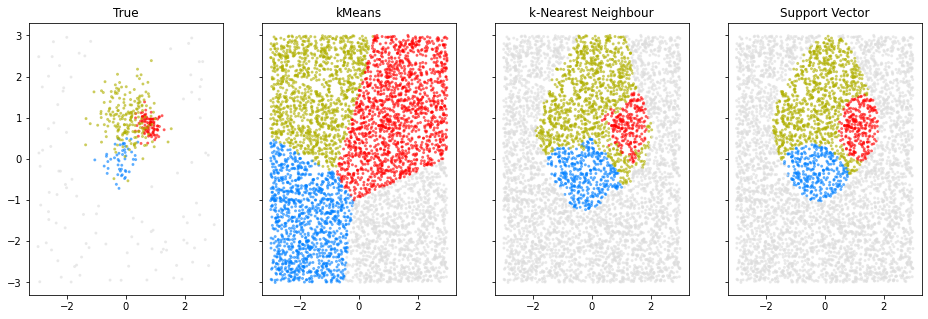

In [29]:
cmap2 = util.colorlist('#0080FF','#FF0000','#B0B000','#DDDDDD')

fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharex=True, sharey=True)
fig.set_size_inches(16,5)
plot_params = dict(s=4, alpha=0.5, cmap=cmap2)

ax0.scatter(*ext_data.T, c=ext_classes, **plot_params)
ax0.set_title('True')

ax1.scatter(*sample_data.T, c=pred1, **plot_params)
ax1.set_title('kMeans')

ax2.scatter(*sample_data.T, c=pred2, **plot_params)
ax2.set_title('k-Nearest Neighbour')

ax3.scatter(*sample_data.T, c=pred3, **plot_params)
ax3.set_title('Support Vector')

## Overall ML workflow

<img src="workflow_diag_01.svg" style="width: 500px;" align="right"/>

The generalised machine learning workflow pictured here illustrates the flow of data and its prepatation prepared.

Initially a quantity of data is collected for the trainaing process. If this is not sufficient to create model with acceptable performance more data may need to be aquired.

The collected data is generally separated into data which forms model **input** and data that acts as a **target**, to which model output is compared. 

After this separation and any general reformatting or encoding (e.g. classes as numerical values) the data is split into separate **testing** and **training** segments, and also (as data alows) a **validation** set, which is only used at the end.

Numeric data is sometimes intially not in the useful value range for the ML models (typically within -1 to +1) or it may have an unhelpful distribution, and so datasets are scaled and normalised. For example, data may be converted to log-space to reduce dynamic range and/or scaled so that it is centred on zero with a standard deviation of 1.0.

Typically data is scaled, or normalized, according to parameters (mean, standard deviation etc.) extracted from **only the training** set, but then also applied in the same way to the **testing and validation** sets. This is so that data not seen by the model cannot influence the pre-processing, but the same pre-processing is used throughout.

Internal model parameters are refined by fitting the ML model to the pre-processed **training** datset. Once fit, the model may then be evaulated by making predictions on the **test** set (not used in fitting) and comparing the model output with ideal target values. 

The model may then be further refined with more training, and/or by optimisation of its hyperparameters. Hyperparameters refer to those settings for a model that control behaviour but which are not optimised during fitting, e.g. how to weight classes, how many neightbours to use in k-NN, which kernel to use for SVM, how many neural network layers to use etc... The choice of which kind of ML model to use, e.g. Random Forest, SVM or k-NN, can be considered part of this optimisation.

With the trained, best model (or models, given several test-train splits) selected, the model is fixed and can be evaluated on a validation data set, which is completely new to the model. Should the model be sufficiently performant, it may then be deployed to run inference (e.g. make predictions) on new input data in a production context.

## Test train split

To objectively assess a machine learning model we need to have a set of data for testing that was not used during training. It is often trivial to create boundaries around all known examples, appearing to make a perfect classifier, when in reality it has effectively memorised the input and doesn't generalise well.

Hence, when developing a particular machine learning model for a given task we almost always separate our total available data into separate *test* and *training* sets. The training data will be used to refine details of the model's parameters because it is used in fitting, while the test data is only used to assess how well the model performs. Typically 10-30% of the data is reserved for testing and it is usually selected randomly. Often we will do serveral, completely separate model fitting attempts with different random allocations of test:train, so that we can assess how the random selection affects our model's performance, e.g. using *k-fold cross validation*, as we illustrate below. 

In some cases, depending on the situation and data availability, there may also be a special, separate *validation* set that is completely separate from both the test and trainaing sets. The notion here is that while the test test is not used to directly fit the model it is generally used to decide the best high-level parameters (*hyperparameters*); an example here would be deciding on the *k* value in a k-NN classifier. Hence, the test data did have some influence on the model formulation. The validataion set, being entirely separate, is only used to demonstrate performance once model paramaters and hyperparameters are fixed.

To split a dataset into test and train sections the handy `train_test_split` function from `sklearn` can be used. We simply supply an array of the possible input data, a corresponding array of the target data (i.e. with corresponding rows) and a test fraction of `0.2`. The result of this are fours arrays; the randomly allocated train and test sets for both the input and targets (ideal outputs).

In [31]:
from sklearn.model_selection import train_test_split
in_train, in_test, target_train, target_test = train_test_split(ext_data, ext_classes, test_size=0.2)

We then fit an SVM model with only the *train* section that comes from the data split. Predictions are then run on the *test* data for assessment. Though, natutally, we are free to predict on any data. 

In [32]:
svm_model3 = sklearn.svm.SVC()
svm_model3.fit(in_train, target_train)
svm_pred3 = svm_model3.predict(in_test)

Plotting the predictions for the x,y points shows that they broadly mtch the trainain set classifications.

Text(0.5, 1.0, 'test - Predict')

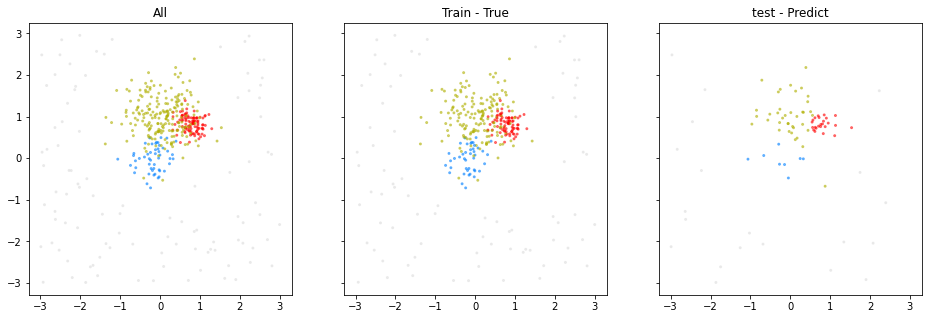

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_size_inches(16,5)

ax1.scatter(*ext_data.T, c=ext_classes, **plot_params)
ax1.set_title('All')

ax2.scatter(*in_train.T, c=target_train, **plot_params)
ax2.set_title('Train - True')

ax3.scatter(*in_test.T, c=svm_pred3, **plot_params)
ax3.set_title('test - Predict')

To assess how well the classifier performs we can calculate various metrics. We will cover many more metrics below, but for now we will calculate the **accuracy** of preditions of the test set. The accuracy is the fraction of the total predictions that are of the correct class and is easy to calculate in `sklearn` using `accuracy_score`, to which we pass the ideal classifications and the predictions.

In [1214]:
acc = sklearn.metrics.accuracy_score(target_test, svm_pred3)
print(f'Accuracy: {100.0*acc:.2f}%')

Accuracy: 86.67%


To provide more detail of how errors were made when prediction amoung the four classes (including our extra null) we can plot a matrix of the true class (label) verses the predicted class. This is known as a *confusion matrix* and is readily acieved via `sklearn`.

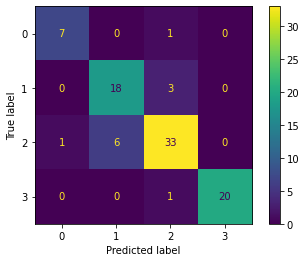

In [35]:
conf_mat = sklearn.metrics.confusion_matrix(target_test, svm_pred3)
disp = sklearn.metrics.ConfusionMatrixDisplay(conf_mat)
disp.plot()

## Cross-validation and ensembles

Moving on from a single, test-train split we can perform multiple different, random splits and then look at the variation in performance of differently trained models. This shows the variance within predictions and means we don't rely on a single test-train split, which could be unrepresentitive. 

The specific way we will achieve this is to use repeated *k-fold* splits, and `sklearn` provides a means to do this easily. Here we will split the data into five chunks, of approx equal, size and use **one** of those chinks as the test set and the remaining **four** as training. The test chunk will then cycle round so we get five different 20%-80% splits   where the test data does not overlap. And then the whole process is repeated with different random allocations, so that overall we get ten different splits. From these ten splits we will train and assess ten separate models.

The `RepeatedKFold` object is first created with its high level parameters; split into `5` chunks, and repeat `2` times. 

In [ ]:
#### from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=7)
num_splits = rkf.get_n_splits(ext_data, ext_classes)

print(num_splits)
print(rkf)


We can loop thrhough the train-test splits that are generated by `rkf.split` and for each we fit an SVM model to the train set, predict on the test set and measure the accuracy. Note how `rkf.split` provides array *indices*, rather than partial copies of the arrays. Hence, we use these indices to select sub-sets from the total data.  

In [46]:
n = len(ext_classes)
point_acc = np.zeros(n)

for i, (train_index, test_index) in enumerate(rkf.split(ext_data)):

    svm_model = sklearn.svm.SVC()
    svm_model.fit(ext_data[train_index], ext_classes[train_index])
    svm_pred = svm_model.predict(ext_data[test_index])
    
    test_targets = ext_classes[test_index]    
    acc = sklearn.metrics.accuracy_score(test_targets, svm_pred)    
    point_acc[test_index] += (test_targets == svm_pred).astype(int)
    
    print(f"Model:{i} Accuracy:{100.0*acc:.2f}%")
    
point_acc /= point_acc.max()

Model:0 Accuracy:85.56%
Model:1 Accuracy:85.56%
Model:2 Accuracy:91.11%
Model:3 Accuracy:87.78%
Model:4 Accuracy:83.33%
Model:5 Accuracy:83.33%
Model:6 Accuracy:90.00%
Model:7 Accuracy:90.00%
Model:8 Accuracy:82.22%
Model:9 Accuracy:86.67%


Here we are calculating an accuracy for each point by assessing whether its class was correctly predicted when it was used as test data. Naturally, we can get a better accuracy estimate by repeating the k-fold splits more times. Plotting the point accuracy shows that the prediction errors occur where we expect; where the classes overlap.

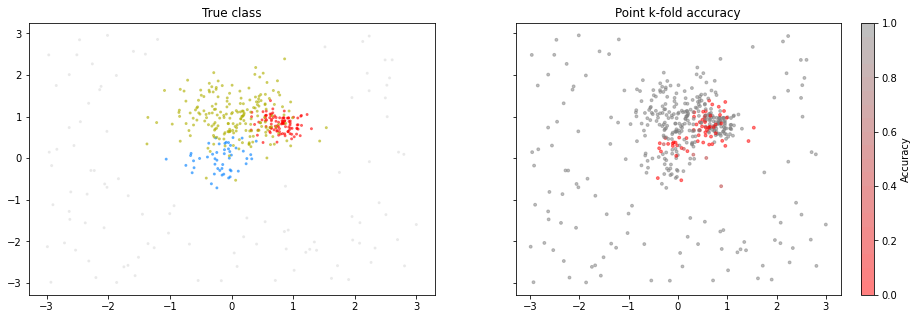

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches(16,5)
cmap3 = util.colorlist('#FF0000','#808080')

ax1.scatter(*ext_data.T, c=ext_classes, **plot_params)
ax1.set_title('True class')

sc2 = ax2.scatter(*ext_data.T, c=point_acc, s=8, alpha=0.5, cmap=cmap3)
ax2.set_title('Point k-fold accuracy')

cb2 = fig.colorbar(sc2, ax=ax2)
cb2.set_label('Accuracy')

## Data as a vector

So far we have illustrated some machine learning principles using simple synthetic data, i.e. each point corresponds to two values; (x,y). Real world examples will tend to have many more than two values for each data point, i.e. points will be N-dimensional vectors; they will have N separate features, where N is much larger than 2. 

As an example, below we use image data where each data point represents the intensity of 64 image pixels. Thus, the data array we use has one row for each image and 64 columns; each pixel is a separate feature.

Another example is for representing biological dequence data. In this case we have categorical data and use a separate feature for the presence of *each* amino acid acid type in each position. Accordingly an amino acid sequence of length 10, where we have 20 possibilities for each position, would be a total length of 200 features. 

It should be noted that with larger feature vectors we will keep the orientation of our data array axes so that the first axis (the rows) will represent the different data point samples, and the second axis (the columns) will represent features. 

Having more than two features per point will make it more challenging to plot the data, but there are various handy methods that we can use reduce the data to 2D (e.g. by projection) while keeping a visual indication of the data structure, and thus show important relationships.

# Image data

Our image data example will be a simple hand written digit dataset provided by `sklearn`. Each image is greyscale and is represented by 64 pixel intensities. There are a total of 1797 images with correponding class labels [0 .. 9], i.e. directly indicating which digit the lmage corresponds to. 



In [48]:
digits = sklearn.datasets.load_digits()
digit_data = digits.data
digit_labels = digits.target
print(digit_data.shape, digit_labels.shape)

(1797, 64) (1797,)


The data vectors are stored as 64 flat values, but we can visualise this data by turning each data point into an 8 by 8 square array that we can show as a density grid using MatPlotLibs `imshow()`. It should be noted that because these images are grescale each pixel has only one intensity value. For colour images we might expect each pixel to have three values (channels): `[red, green, blue]`, and thus the colour image data would be three-dimensional.

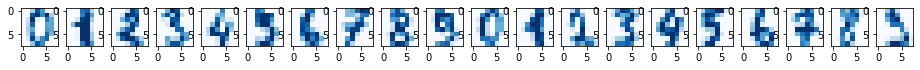

In [49]:
fig, axs = plt.subplots(1, 20)
fig.set_size_inches(16,8)

for i in range(20):
    axs[i].imshow(digit_data[i].reshape(8,8), cmap='Blues')

To visualise the whole dataset we can project the data down to two dimensions. We will use two common methods for this PCA and UMAP.

PCA finds the linear axes in the data (a weighted combination of the 64 dimensions) that maximise the variance; shows most spread. Subsequent principle components are in directions orthogonal to previous components; they show the directions of maximum variance along a separate axis. Typically components are created in terms of the most important first, and for plotting purposes we usually only keep the first two.

A `PCA` model is created in `sklearn`, specifiying the number of components we which to keep. The the model is then fit to the image data, which in this case means to calculate the first two principle components (axes).

In [50]:
pca_model = sklearn.decomposition.PCA(2)
pca_model.fit(digit_data)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


We run the `.transform()` method on image data. This will convert the 64 input features to just two principle comonents that we can plot.

In [51]:
pca_proj = pca_model.transform(digit_data)
print(pca_proj.shape)

(1797, 2)


If we plot the first two principle components as a scatter, and color points according to digit class, we can see that there is a degree of segregation. However, it is clear that only taking two principle components is not enough to perform a good separation.

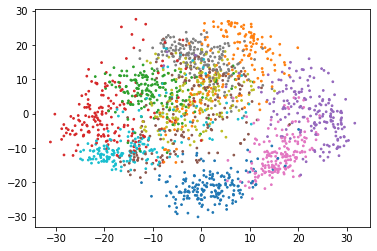

In [52]:
plt.scatter(*pca_proj.T, s=3, c=digit_labels, cmap='tab10')

UMAP seeks to plot points in a lower dimensional space (fewer axes) to maximise similarity of close points. This is unlike PCA that essentially maximises dissimilarity. An advantage of UMAP, and other similar methods like tSNE, is that it tends to cluster points that are similar (along the range of input features) even if the features don't separate well if globally projected to 2D (e.g. with PCA). It should be noted that the closest points in the input data will be close in the UMAP, but as input points become more dissimilar their precise separation on the UMAP becomes more meaningless.

UMAP is invoked in an analogous manner to PCA. However, it is notable that `UMAP` is *not* provided by `sklearn` and its module must be installed separately. 

In [53]:
from umap import UMAP
umap_model = UMAP(n_components=2)
umap_model.fit(digit_data)
umap_proj = umap_model.transform(digit_data)
print(umap_proj.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12030. The TBB threading layer is disabled.
  warnings.warn(problem)


(1797, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Plotting the 2D projection generated by UMAP we see it does a superb job at separating the labels. In essence PCA did less well here because the boundaries cannot be described in a linear manner (compare k-Means with k-NN above).
Note that re-running UMAP can sometimes result in the 2D coordinates flipping and rotating; local proximity information is preserved each time but the precise, projected coordinates are arbitrary. 

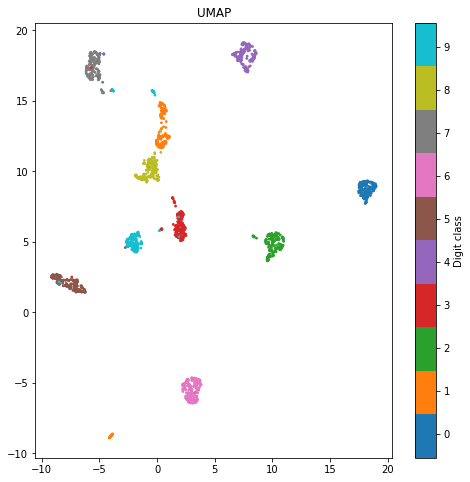

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

sc = ax.scatter(*umap_proj.T, s=3, c=digit_labels, cmap='tab10')
ax.set_title('UMAP')

cb = fig.colorbar(sc, ax=ax)
cb.ax.set_yticks(np.linspace(0.5, 8.5, 10))
cb.ax.set_yticklabels(range(10))
cb.set_label('Digit class')

In [ ]:
## Hierarchical clustering? with correlation/distance matrices
##
##
##
##

Adifferent approach to visualising high-dimensional data 


##  <font color="purple">Exercise:</font>

<font color="purple">Train an `sklearn` classifier of your choice on the above digit data and compare its predictions to the true/target classes by calculating its accuracy.
</font>

# Sequence data

Next we take a look at some biological sequence data. Specifically, this will be protein amino acid sequences that are stored as one-letter codes.

Some demonstration data is provided with this course form the `util` module. With the data loaded we can see that it is arranged as a list of lists. Each inner list represents a data row and contains a sequence of characters representing the one-letter codes. 

In [55]:
seqs = util.load_sequences()
print(seqs[0])

['G', 'K', 'K', 'R', 'S', 'T', 'A', 'L', 'F', 'V', 'F', 'C', 'G', 'A', 'L', 'V', 'I', 'V', 'T', 'V', 'F', 'A', 'V', 'T', 'Y', 'A', 'A', 'R', 'I', 'I', 'T', 'I', 'S', 'H', 'K', 'S', 'P', 'P', 'P', 'D']


To use this categorical data with most machine learning methods we need to encode the different amino acid classes numerically. Typically this is done using what is termed *one-hot encoding*. The idea here is that each position in the sequence is represented by a vector of length 20 (because there are 20 possible amino acid types) where all values but one are set to `0.0` and one value, representaing the type of amino acid present, is set to `1.0`. In other words the position of the `1.0` in the array of 20 indicates the amino acid class.

The `sklearn` module provides a handy method to convert our initial list of one-letter labels into a one-hot vector. The `categories` available for each column is the same list of possible amino acid sequences. There are `5000` protein sequences, so that is the number of output rows. The number of feature columns is `800` because we have 40 positions of 20 possibilites, noting that the encoder has joined the one-hot encodings for each position into one long vector. It is notable here that we must specifiy the categories (from a list of acceptable amino acid codes). This is required because the `OneHotEncoder` would otherwide be frugal, and would not necessarlity use the same encoding for each sequence position; if an amino acid type were entirely missing in from a position (over the whole dataset) it would be omitted from the encoding. Position dependent encoding may be unhepful with such homogenous (in this case all amino acid) data, as it doesn't allow the data to be offset or used with position independent methods (such as convolutional neural networks).

In [58]:
aas = list('ACDEFGHIKLMNPQRSTVWY')
cats = [aas for i in range(len(seqs[0]))]
encoder = sklearn.preprocessing.OneHotEncoder(sparse_output=False, categories=cats)
seq_data = encoder.fit_transform(seqs)
print(seq_data.shape)

(5000, 800)


If we inspect the `seq_data` we find that each row is indeed mostly zeros, with a `1.0` within every 20 values.

In [61]:
print(seq_data[0,:20])   # Row 0, first sequence pos
print(seq_data[0,20:40]) # Row 0, second sequence pos

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Doing a PCA transform of this data shows that the sequence data has some interesting structure.

(5000, 2)


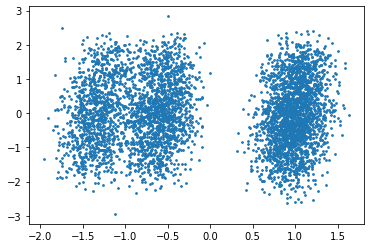

In [62]:
pca_model = sklearn.decomposition.PCA(n_components=2, whiten=True)
pca_proj = pca_model.fit_transform(seq_data)
print(pca_proj.shape)

plt.scatter(*pca_proj.T, s=3)

Performing PCA on the sequence data but keeping more than two compomponents allows us to create a lower dimensionality approximation to the data. Here we investigate this compressed data for structure using UMAP.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(5000, 20)
(5000, 2)


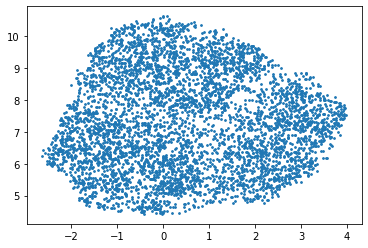

In [63]:
pca_big = sklearn.decomposition.PCA(n_components=20, whiten=True)
pca_big_proj = pca_big.fit_transform(seq_data)

umap_seq_proj = UMAP(n_components=2).fit_transform(pca_big_proj)
print(pca_big_proj.shape)
print(umap_seq_proj.shape)

plt.scatter(*umap_seq_proj.T, s=3)

## Hetrogenous data

The examples of data sets thus far have had homogeneous feature columns; the different features were the same kind of measurement/value, abeit in different positions.

Next we will look at data with hetrogenous features. For this we will use the Wisconsin breast cancer dataset that is provided via `sklearn`. As we can see, there are 569 datapoints with features comprised of different kinds of cytological observation. Each feature will have a different distribution of numerical values, and this we must scale or normalised each of these features separately. 

Below we load the breat cancer dataset and print it description.

In [64]:
bc_set = sklearn.datasets.load_breast_cancer()
print(bc_set.keys())
print(bc_set['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 f

With the data loaded the next task is to split it into test and training sets. As mentioned, we do this prior to any pre-processing so that the test set cannot influence the outcome.

To normalise the diffeent feature columns we use the `StandardScaler()`. This will centre each feature on zero (move the mean) and set its standard deviation to 1.0; in essence this is Z-normalisation on the columns.
There are several types of scaler available in `sklearn` but this one works well in this case. In general different scales should be tried and the transformed data plotted to see if it is centred and has a relatively even spread. Often it is a good idea for a feature to be approximately normally distributed, as long as it is centralised and somewhat unbounded. For evenly spread or bounded features (e.g. a coordinate location) it is often sufficient to scale values into a useful range ([0,1] or [-1, +1]).

In [65]:
bc_data = bc_set.data
bc_labels = bc_set.target

in_train, in_test, out_train, out_test = sklearn.model_selection.train_test_split(bc_data, bc_labels)

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(in_train)

in_train = scaler.transform(in_train)
in_test = scaler.transform(in_test)

scaled_bc_data = scaler.transform(bc_data)

print(in_train.shape, in_test.shape)
print(out_train.shape, out_test.shape)

(426, 30) (143, 30)
(426,) (143,)


## Class imbalance

  - under and over sampling
  - mention class weights
  - mention smote
  

In [995]:
# Under sampling example

# Fetch indices
class0 = np.nonzero(bc_labels == 0)[0]
class1 = np.nonzero(bc_labels == 1)[0]

print(class0[:10])
print(class1[:10])

[0 1 2 3 4 5 6 7 8 9]
[19 20 21 37 46 48 49 50 51 52]


In [996]:
n0 = len(class0)
n1 = len(class1)

print(n0, n1)

212 357


In [997]:
np.random.shuffle(class1)
class1_subset = class1[:n0]

n2_s = len(class1_subset)

print(n2_s)

212


In [998]:
balanced_idx = np.concatenate([class0, class1_subset])
balanced_labels = bc_labels[balanced_idx]
balanced_data = bc_data[balanced_idx]
print(balanced_data.shape)

(424, 30)


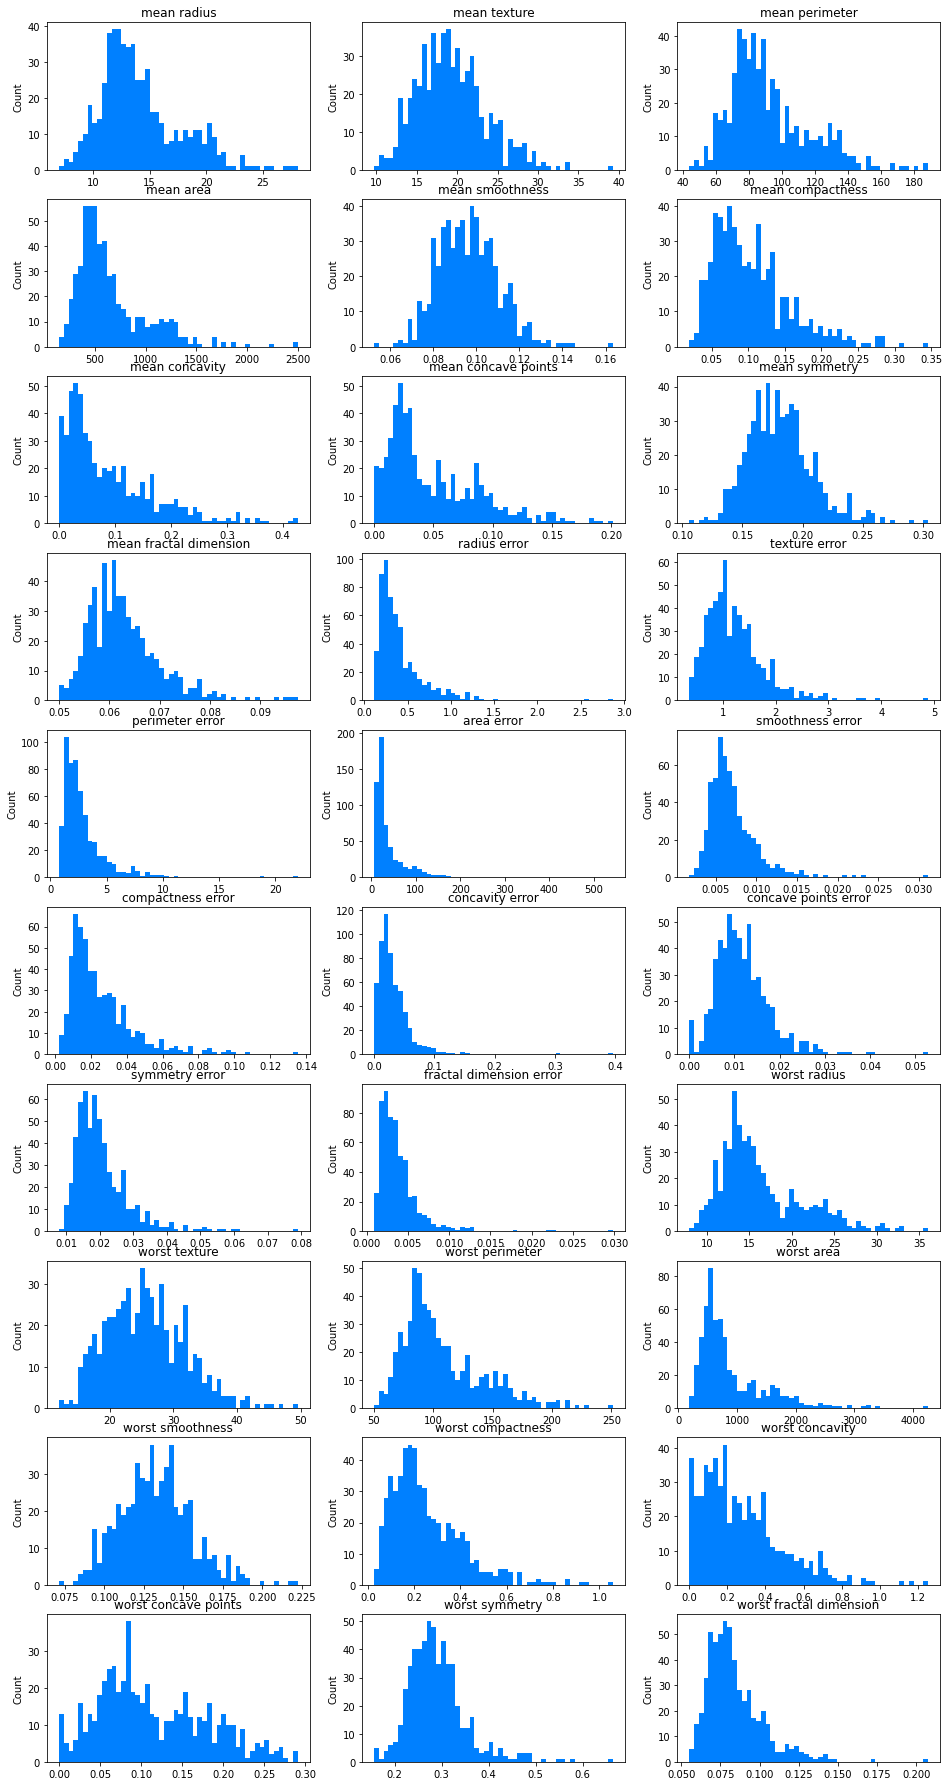

In [999]:
n, m = bc_data.shape

fig, axs = plt.subplots(10, 3)
fig.set_size_inches(16,32)

for i in range(m):
    ax = axs[i // 3, i % 3]
    ax.hist(bc_data[:,i], bins=50, color='#0080FF')
    ax.set_title(bc_set.feature_names[i])
    ax.set_ylabel('Count')

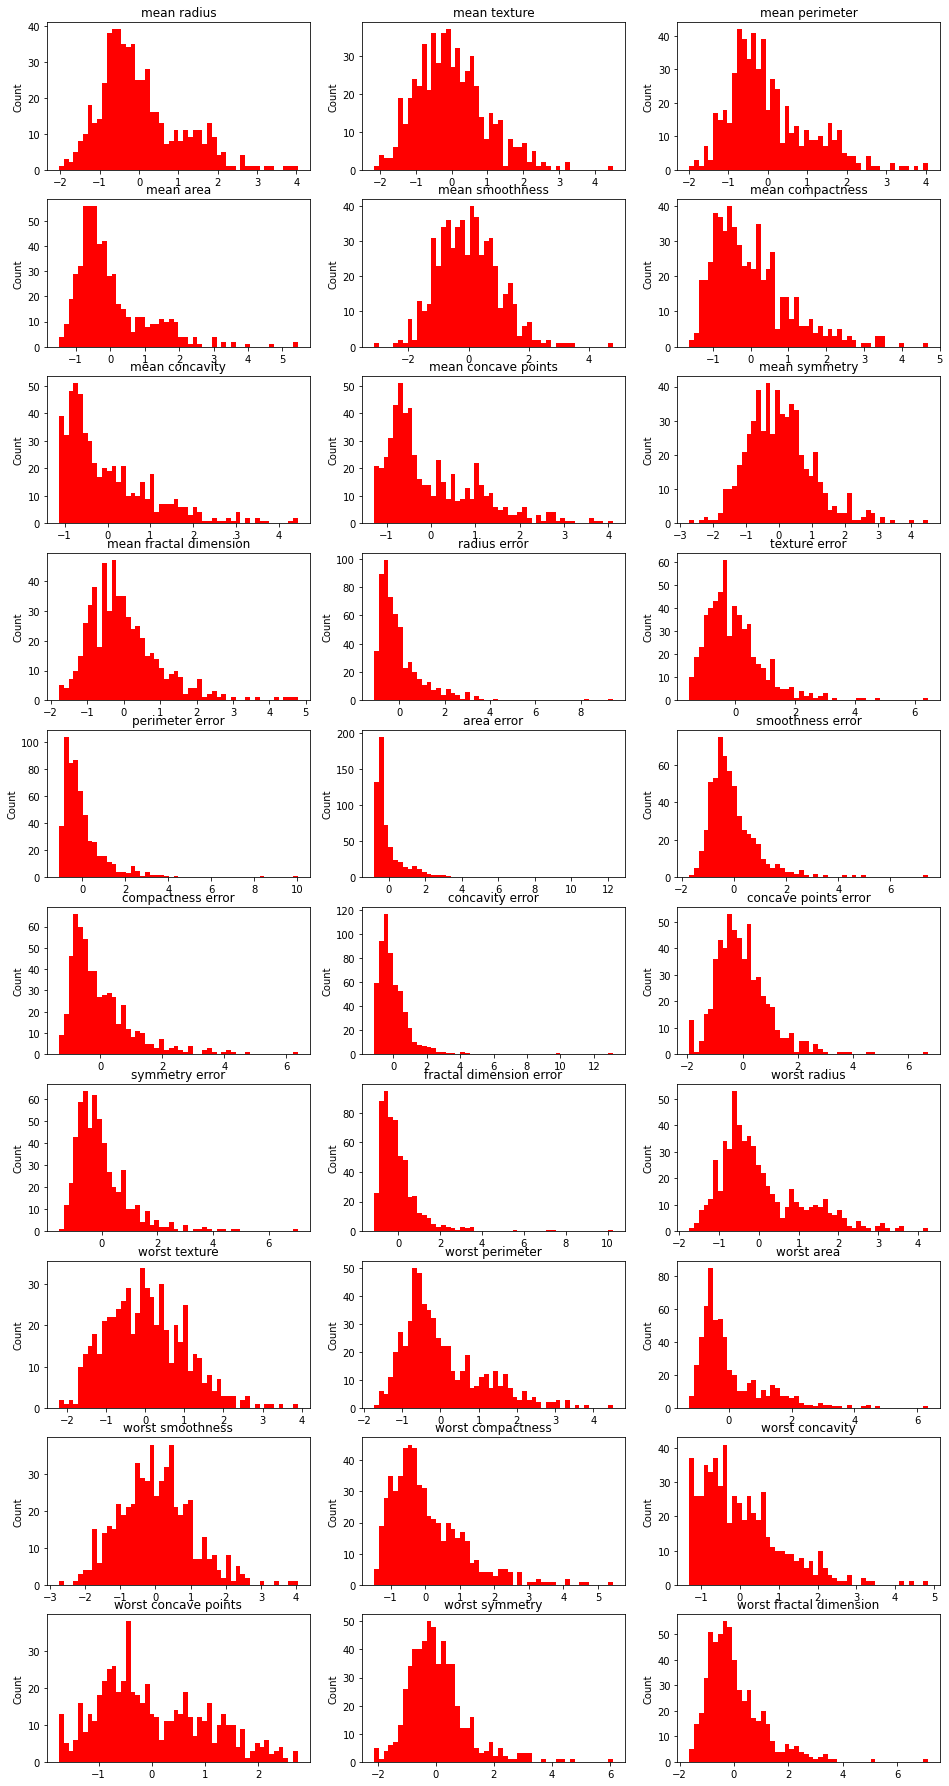

In [1000]:
n, m = bc_data.shape

fig, axs = plt.subplots(10, 3)
fig.set_size_inches(16,32)

for i in range(m):
    ax = axs[i // 3, i % 3]
    ax.hist(scaled_bc_data[:,i], bins=50, color='#FF0000')
    ax.set_title(bc_set.feature_names[i])
    ax.set_ylabel('Count')

In [1001]:
import course_util as util

,n_neighbors,15
,n_components,2
,metric,'euclidean'
,metric_kwds,None
,output_metric,'euclidean'
,output_metric_kwds,None
,n_epochs,None
,learning_rate,1.0
,init,'spectral'
,min_dist,0.1
,spread,1.0


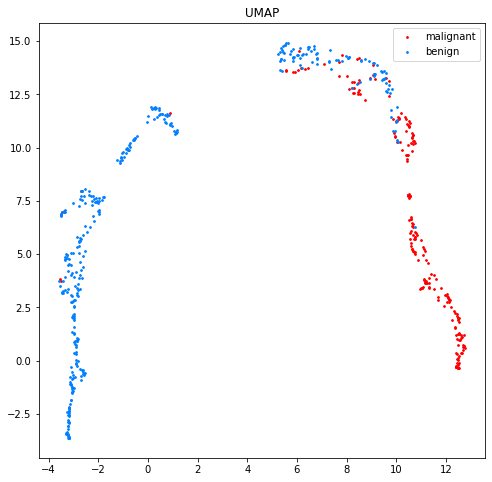

In [1002]:
import importlib
importlib.reload(util)
util.plot_umap(bc_data, bc_labels, bc_set.target_names)

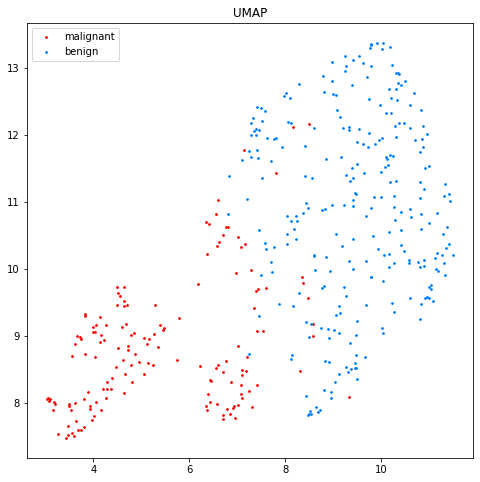

In [1003]:
umap_model = util.plot_umap(in_train, out_train, bc_set.target_names)

In [1004]:
knn_model4 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model4.fit(in_train, out_train)
knn_classes4 = knn_model4.predict(in_train)
knn_pred = knn_model4.predict(in_test)

svm_model4 = sklearn.svm.SVC(class_weight='balanced')
svm_model4.fit(in_train, out_train)
svm_classes4 = svm_model4.predict(in_train)
svm_pred = svm_model4.predict(in_test)

,n_neighbors,15
,n_components,2
,metric,'euclidean'
,metric_kwds,None
,output_metric,'euclidean'
,output_metric_kwds,None
,n_epochs,None
,learning_rate,1.0
,init,'spectral'
,min_dist,0.1
,spread,1.0


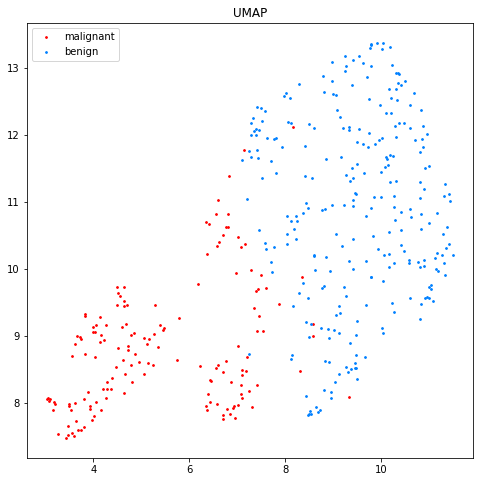

In [1005]:
util.plot_umap(in_train, svm_classes4, bc_set.target_names, umap_model=umap_model)

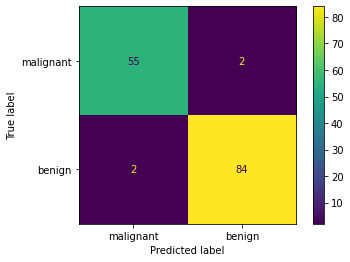

In [1006]:
conf_mat = sklearn.metrics.confusion_matrix(out_test, svm_pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(conf_mat, display_labels=bc_set.target_names)
disp.plot()

## Assessment metrics
  
  - regression metrics
  - confusion matrix 
  - precision, accuracy, recall, F1
  - ROC

Precision: TP / (TP + FP) ; Class Correct / Class Predicted  ; correct proportion
    
Recall: TP / (TP + FN) ; Class Correct / Class Total ; found proportion  

In [1008]:
pre = sklearn.metrics.precision_score(out_test, svm_pred)
rec = sklearn.metrics.recall_score(out_test, svm_pred)

print(f'Recall:{rec:.2f} F1:{f1:.2f}')

Recall:0.98 F1:0.98


Accuracy: (TP + TN) / (Pos + Neg) ; Correct / Total
    
F1 = Geometric mean of precision and recallset

Cohen's Kappa: How much better than random 

In [1010]:
acc = sklearn.metrics.accuracy_score(out_test, svm_pred)
kap = sklearn.metrics.cohen_kappa_score(out_test, svm_pred)
f1 = sklearn.metrics.f1_score(out_test, svm_pred)

print(f'Acc:{acc:.2f} Kappa:{kap:.2f} Precision:{pre:.2f}')

Acc:0.97 Kappa:0.94 Precision:0.98


In [1011]:
print(sklearn.metrics.classification_report(out_test, svm_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        57
           1       0.98      0.98      0.98        86

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Text(0.5, 1.0, '2-class Precision-Recall curve')

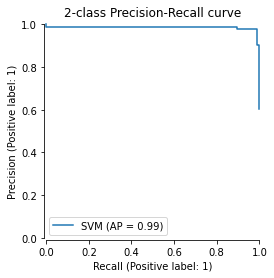

In [1012]:
from sklearn.metrics import PrecisionRecallDisplay

fig = PrecisionRecallDisplay.from_estimator(knn_model4, in_test, out_test, name="SVM", despine=True)
fig.ax_.set_title("2-class Precision-Recall curve")

## Feature importance
 
  - permutation_importance

In [1034]:
from sklearn.inspection import permutation_importance
result = permutation_importance(knn_model4, in_train, out_train, n_repeats=30, random_state=7)
importance = result.importances_mean
order = importance.argsort()[::-1]

print(f'FEATURE                    IMPORTANCE')
for i in order:
    print(f"{bc_set.feature_names[i]:24} {importance[i]:7.3f}")
              

FEATURE                    IMPORTANCE
worst texture              0.012
worst smoothness           0.010
mean texture               0.009
mean smoothness            0.008
worst radius               0.007
worst concavity            0.006
worst area                 0.006
worst perimeter            0.006
symmetry error             0.005
perimeter error            0.005
radius error               0.005
mean concavity             0.005
mean radius                0.004
mean area                  0.004
worst concave points       0.004
mean perimeter             0.004
area error                 0.003
mean fractal dimension     0.003
mean concave points        0.003
worst fractal dimension    0.003
worst compactness          0.003
smoothness error           0.002
mean symmetry              0.002
mean compactness           0.001
texture error              0.001
concave points error       0.001
concavity error           -0.000
compactness error         -0.001
fractal dimension error   -0.002
worst

## Regression

In [968]:
housing_data = sklearn.datasets.fetch_california_housing()

In [1013]:
print(housing_data.keys())
#print(housing_data['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [970]:
print(housing_data['data'].shape)
print(housing_data['feature_names'])

(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [971]:
print(housing_data['target'].shape)
print(housing_data['target_names'])

(20640,)
['MedHouseVal']


## Data preprocessing, normalisation

  - demo standard scaler : before and after 2D
  

In [972]:
scaler = sklearn.preprocessing.PowerTransformer()
scaler.fit(train_data)
scaled_data = scaler.transform(train_data)

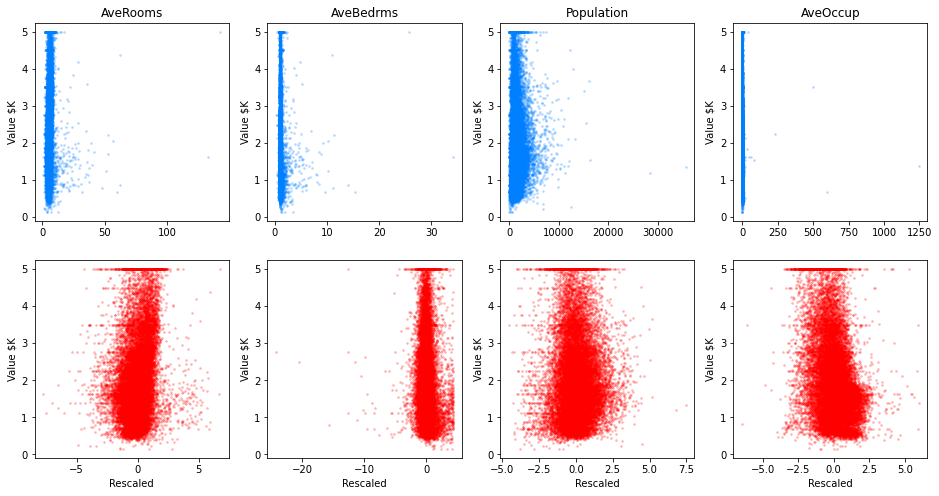

In [975]:
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(16,8)

for i in [2,3,4,5]:
    ax1 = axs[0, i-2]
    ax1.scatter(train_data[:,i], house_vals, color='#0080FF', s=3, alpha=0.2)
    ax1.set_title(housing_data['feature_names'][i])
    ax1.set_ylabel('Value $K')
    
    ax2 = axs[1, i-2]
    ax2.scatter(scaled_data[:,i], house_vals, color='#FF0000', s=3, alpha=0.2)
    ax2.set_ylabel('Value $K')
    ax2.set_xlabel('Rescaled')

In [976]:
umap_model = UMAP(n_components=2)
umap_model.fit(scaled_data)
umap_proj = umap_model.transform(scaled_data)

pca_model = sklearn.decomposition.PCA(n_components=2)
pca_model.fit(scaled_data)
pca_proj = pca_model.transform(scaled_data)

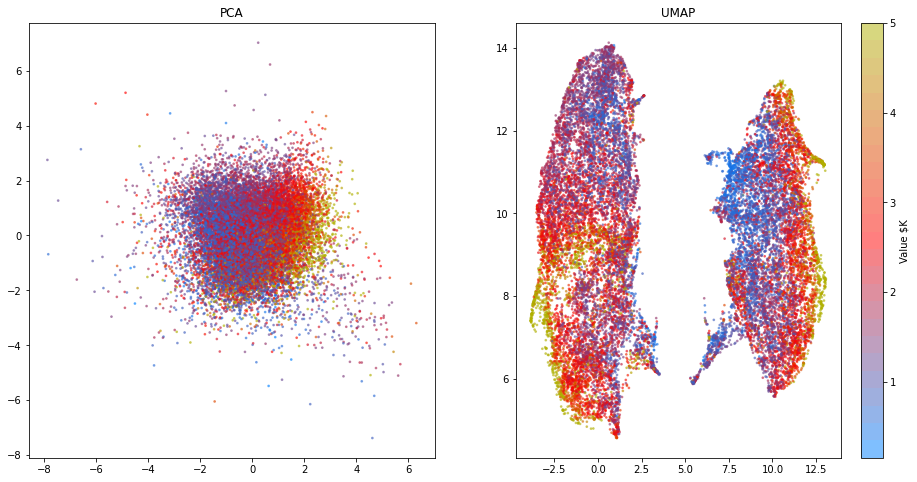

In [977]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,8)

ax1.scatter(pca_proj[:,0], pca_proj[:,1], s=3, alpha=0.5, c=house_vals, cmap=cmap1)
ax1.set_title('PCA')
sc = ax2.scatter(umap_proj[:,0], umap_proj[:,1], s=3, alpha=0.5, c=house_vals, cmap=cmap1)
ax2.set_title('UMAP')

cb2 = fig.colorbar(sc, ax=ax2)
cb2.set_label('Value $K')

Show a simple least squares regression?

Show SVM regression

In [ ]:
scaled_vals = (house_vals - house_vals.mean())/house_vals.std()

In [987]:
svr_model = sklearn.svm.SVR()
svr_model.fit(scaled_data, scaled_vals)
predicted_vals = svr_model.predict(scaled_data)

Text(0, 0.5, 'Prediction')

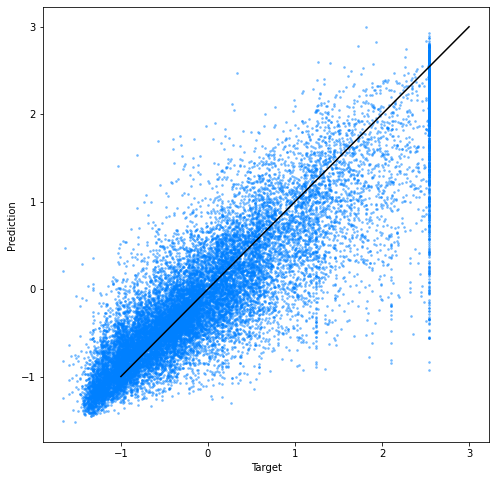

In [990]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

ax.scatter(scaled_vals, predicted_vals, s=3, color='#0080FF', alpha=0.4)
ax.plot([-1, 3], [-1, 3], color='k')
ax.set_xlabel('Target')
ax.set_ylabel('Prediction')set

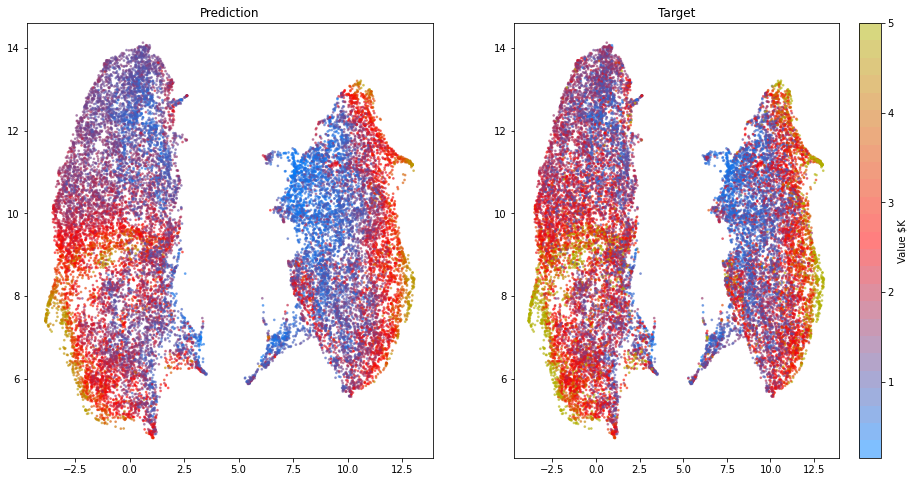

In [1014]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,8)

ax1.scatter(umap_proj[:,0], umap_proj[:,1], s=3, alpha=0.5, c=predicted_vals, cmap=cmap1)
ax1.set_title('Prediction')

sc = ax2.scatter(umap_proj[:,0], umap_proj[:,1], s=3, alpha=0.5, c=house_vals, cmap=cmap1)
ax2.set_title('Target')

cb2 = fig.colorbar(sc, ax=ax2)
cb2.set_label('Value $K')

## Missing values



## Lastly

Model choice

  - tuning hyperparameters
  - auto sklearn
  